In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [8]:
train_set = pd.read_csv("Train/train_set_sin_categoricos.csv")

train_set.head(10)

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,6,487,12198,2,30,6,5,1,1,0,...,0,0,0,0,0,0,0,0,0,3
1,8,900,2812,2,10,8,7,0,1,0,...,0,0,0,0,0,0,0,0,0,2
2,21,363,8973,2,10,5,5,0,1,0,...,0,0,0,0,0,0,0,0,0,3
3,22,418,10694,2,10,6,5,0,1,0,...,0,0,0,0,0,0,0,0,0,2
4,11,131,1488,3,30,8,9,1,0,0,...,0,0,0,0,0,0,0,0,0,3
5,8,558,6089,2,10,9,5,0,1,0,...,0,0,0,0,0,0,0,0,0,2
6,9,475,12066,2,25,3,4,0,1,0,...,0,0,0,0,0,0,0,0,0,3
7,20,323,12236,2,0,8,6,0,0,0,...,0,0,0,0,0,0,0,0,0,1
8,0,757,7219,2,15,8,6,0,1,0,...,0,0,0,0,0,0,0,0,0,2
9,26,886,994,1,0,13,4,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [9]:
X, y = train_set.iloc[:,:-1], train_set.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [10]:
params = {
    'n_estimators': [20, 50, 70, 100],\
    'max_features': ['auto', 'log2'],
    'max_depth': [20, 50, 70],
    'min_samples_split': [5, 50, 100],
    'min_samples_leaf': [20]
}

In [12]:
opt = GridSearchCV(RandomForestClassifier(), params)
opt.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [20, 50, 70],
                         'max_features': ['auto', 'log2'],
                         'min_samples_leaf': [20],
                         'min_samples_split': [5, 50, 100],
                         'n_estimators': [20, 50, 70, 100]})

In [13]:
opt.best_estimator_

RandomForestClassifier(max_depth=50, min_samples_leaf=20, min_samples_split=5,
                       n_estimators=50)

In [14]:
opt.best_params_

{'max_depth': 50,
 'max_features': 'auto',
 'min_samples_leaf': 20,
 'min_samples_split': 5,
 'n_estimators': 50}

In [17]:
opt.best_score_

0.693783576362241

In [31]:
preds = opt.predict(X_test),
f1 = np.sqrt(f1_score(y_test, preds[0], average='micro')),
print("F1-Mean Score %f" % (f1))

F1-Mean Score 0.832229


In [33]:
rf_model = RandomForestClassifier(n_estimators=50, max_depth=50, max_features='auto', min_samples_leaf=20,\
                                    min_samples_split=5, n_jobs=-1)

rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=50, min_samples_leaf=20, min_samples_split=5,
                       n_estimators=50, n_jobs=-1)

In [42]:
rf_preds = rf_model.predict(X_test)
f1 = f1_score(y_test, rf_preds, average='micro')
print("F1 Score", f1)

F1 Score 0.6946011281224819


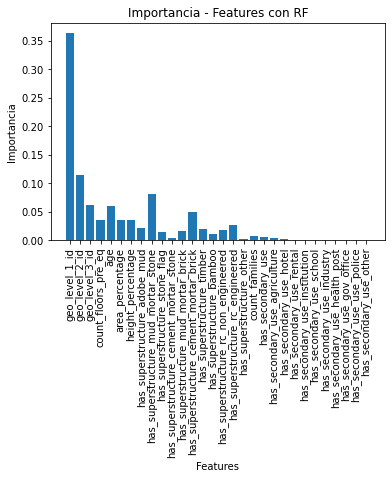

In [46]:
plt.bar(X_train.columns, rf_model.feature_importances_)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importancia')
plt.title('Importancia - Features con RF')
plt.show()

## Pruebas manuales

In [52]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [53]:
rf_preds = rf_model.predict(X_test)
f1 = f1_score(y_test, rf_preds, average='micro')
print("F1 Score", f1)

F1 Score 0.7127124822531753


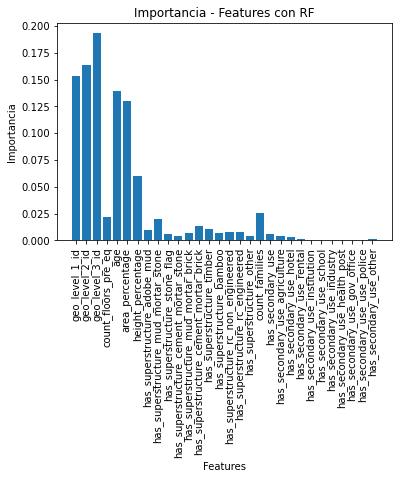

In [54]:
plt.bar(X_train.columns, rf_model.feature_importances_)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importancia')
plt.title('Importancia - Features con RF')
plt.show()

In [55]:
rf_model = RandomForestClassifier(n_estimators=100, max_depth=25, min_samples_split=5, min_samples_leaf=5, max_features='log2')
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)
f1 = f1_score(y_test, rf_preds, average='micro')
print("F1 Score", f1)

F1 Score 0.6966731898238747


In [56]:
rf_model = RandomForestClassifier(n_estimators=50, max_depth=25, min_samples_split=5, min_samples_leaf=5, max_features='log2')
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)
f1 = f1_score(y_test, rf_preds, average='micro')
print("F1 Score", f1)

F1 Score 0.6958290165381221


In [57]:
rf_model = RandomForestClassifier(n_estimators=100, max_depth=50, min_samples_split=5, min_samples_leaf=5, max_features='log2')
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)
f1 = f1_score(y_test, rf_preds, average='micro')
print("F1 Score", f1)

F1 Score 0.7097578757530411


In [58]:
rf_model = RandomForestClassifier(n_estimators=100, max_depth=100, min_samples_split=5, min_samples_leaf=5, max_features='log2')
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)
f1 = f1_score(y_test, rf_preds, average='micro')
print("F1 Score", f1)

F1 Score 0.7092206745711983


In [60]:
rf_model = RandomForestClassifier(n_estimators=100, max_depth=50, min_samples_split=3, min_samples_leaf=5, max_features='log2')
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)
f1 = f1_score(y_test, rf_preds, average='micro')
print("F1 Score", f1)

F1 Score 0.708952073980277


In [61]:
rf_model = RandomForestClassifier(n_estimators=100, max_depth=25, min_samples_split=10, min_samples_leaf=5, max_features='sqrt')
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)
f1 = f1_score(y_test, rf_preds, average='micro')
print("F1 Score", f1)

F1 Score 0.7081462722075131


In [62]:
rf_model = RandomForestClassifier(n_estimators=100, max_depth=25, min_samples_split=10, min_samples_leaf=5, max_features='log2')
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)
f1 = f1_score(y_test, rf_preds, average='micro')
print("F1 Score", f1)

F1 Score 0.6986301369863014


In [63]:
rf_model = RandomForestClassifier(n_estimators=150)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)
f1 = f1_score(y_test, rf_preds, average='micro')
print("F1 Score", f1)

F1 Score 0.713710141590883


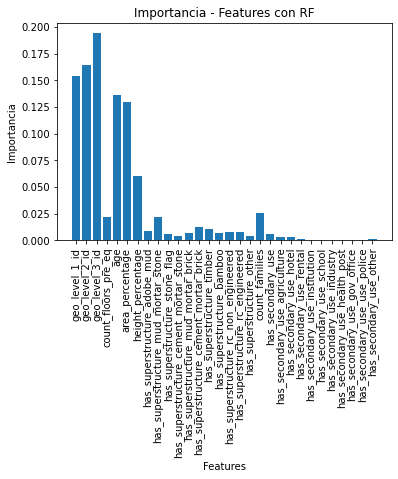

In [64]:
plt.bar(X_train.columns, rf_model.feature_importances_)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importancia')
plt.title('Importancia - Features con RF')
plt.show()